# Dane - kluczowy element w uczeniu maszynowym
Created by: Martyna Stasiak

---

## 1. Wprowadzenie

W uczeniu maszynowym dane są podstawowym budulcem modeli. 

Model nie posiada żadnej wbudowanej wiedzy - wszystkiego musi nauczyć się 
na podstawie dostarczonych danych.

Ten notebook wprowadzi Cię w podstawy analizy danych za pomocą biblioteki Pandas
oraz krok po kroku wprowadzi w EDA (Exploratory Data Analysis) i przygotowanie pipeline'u.



## 2. Rodzaje danych

Dane mogą być różnego rodzaju:
- Numeryczne (np. wiek, wzrost)
- Kategoryczne (np. płeć, klasa podróży)

Typy danych w Pandas:
- int64: liczby całkowite (np. ilość rodzeństwa)
- float64: liczby rzeczywiste (np. cena biletu)
- object: teksty lub kategorie (np. imię pasażera)

Przykład: Załadujmy zbiór Titanic

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [82]:
# Wyświetlenie pierwszych 5 wierszy
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Rozpoznawanie typów danych i podstawowe operacje Pandas
Sprawdźmy typy danych oraz nauczmy się prostych operacji Pandas:
- .dtypes - sprawdzanie typów kolumn
- .rename() - zmiana nazw kolumn
- .dropna() - usuwanie brakujących danych
- .describe() - podstawowe statystyki
- .info() - podsumowanie danych


In [84]:
# Sprawdzamy kolumny w DataFrame
data.columns # Wyświetlanie kolumn DataFrame

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [85]:
# Sprawdzamy kształt DataFrame - ilość wierszy i kolumn
print(f"Kształt DataFrame titanic: {data.shape}")
print(f"Liczba wierszy DataFrame titanic: {data.shape[0]}, liczba kolumn: {data.shape[1]}")

Kształt DataFrame titanic: (891, 12)
Liczba wierszy DataFrame titanic: 891, liczba kolumn: 12


In [86]:
# Typy danych
print("Typy danych:")
print(data.dtypes)

# Zmieńmy nazwy kolumn na małe litery i podkreślenia
# To dobra praktyka w pracy z Pandas

# Przed zmianą nazw
print("Przed zmianą nazw:", data.columns.tolist())

# Zmiana nazw
data = data.rename(columns={col: col.lower().replace(" ", "_") for col in data.columns})

# Po zmianie
print("Po zmianie nazw:", data.columns.tolist())

Typy danych:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Przed zmianą nazw: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Po zmianie nazw: ['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']


In [87]:
# Informacje o zbiorze danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
# Statystyki opisowe
data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Exploratory Data Analysis (EDA)
Eksploracyjna analiza danych (EDA) to pierwszy krok w pracy z danymi.
Celem jest lepsze zrozumienie struktury, wartości i potencjalnych problemów.

In [89]:
# Sprawdźmy brakujące dane
data.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

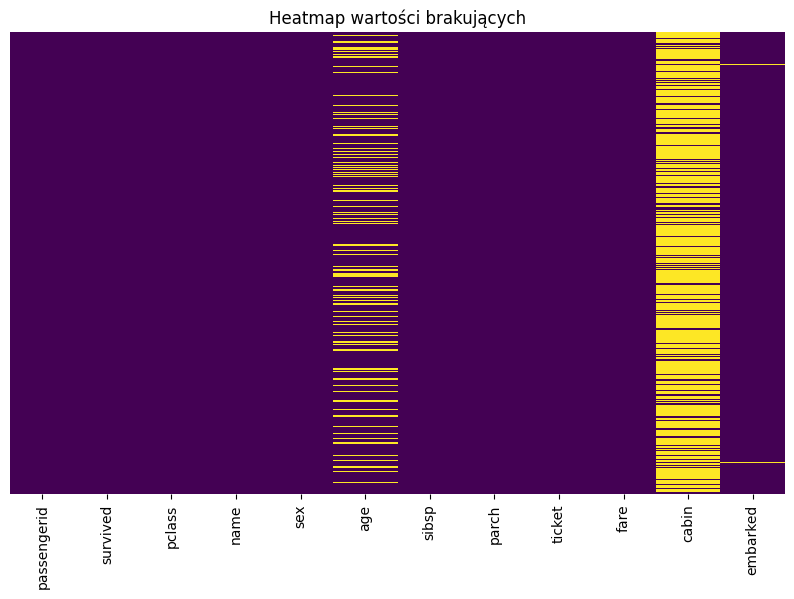

In [90]:
# Wizualizacja brakujących danych
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Heatmap wartości brakujących')
plt.show()

In [91]:
# Sprawdzamy numer wartości unikalnych w kolumnach 'Name', 'Ticket',  'Cabin'
unique_names = data['name'].nunique()
unique_tickets = data['ticket'].nunique()
unique_cabins = data['cabin'].nunique()

print("\n\nIlość wartości unikalnych w 'Name':", unique_names)
print("Ilość wartości unikalnych w 'Ticket':", unique_tickets)
print("Ilość wartości unikalnych w 'Cabin':", unique_cabins)



Ilość wartości unikalnych w 'Name': 891
Ilość wartości unikalnych w 'Ticket': 681
Ilość wartości unikalnych w 'Cabin': 147


In [92]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [93]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Definicja palety kolorów do plotów
palet = ["#b0438d", "#f0eda3", "#8b5ed6", "#290b5c"]
# Definicja zmiennych do analizowania
input_features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
# Osobno analizowane zmienne kategoryczne i numeryczne
numerical_features = ['age', 'sibsp', 'parch', 'fare']
categorical_features = ['pclass', 'sex', 'embarked']

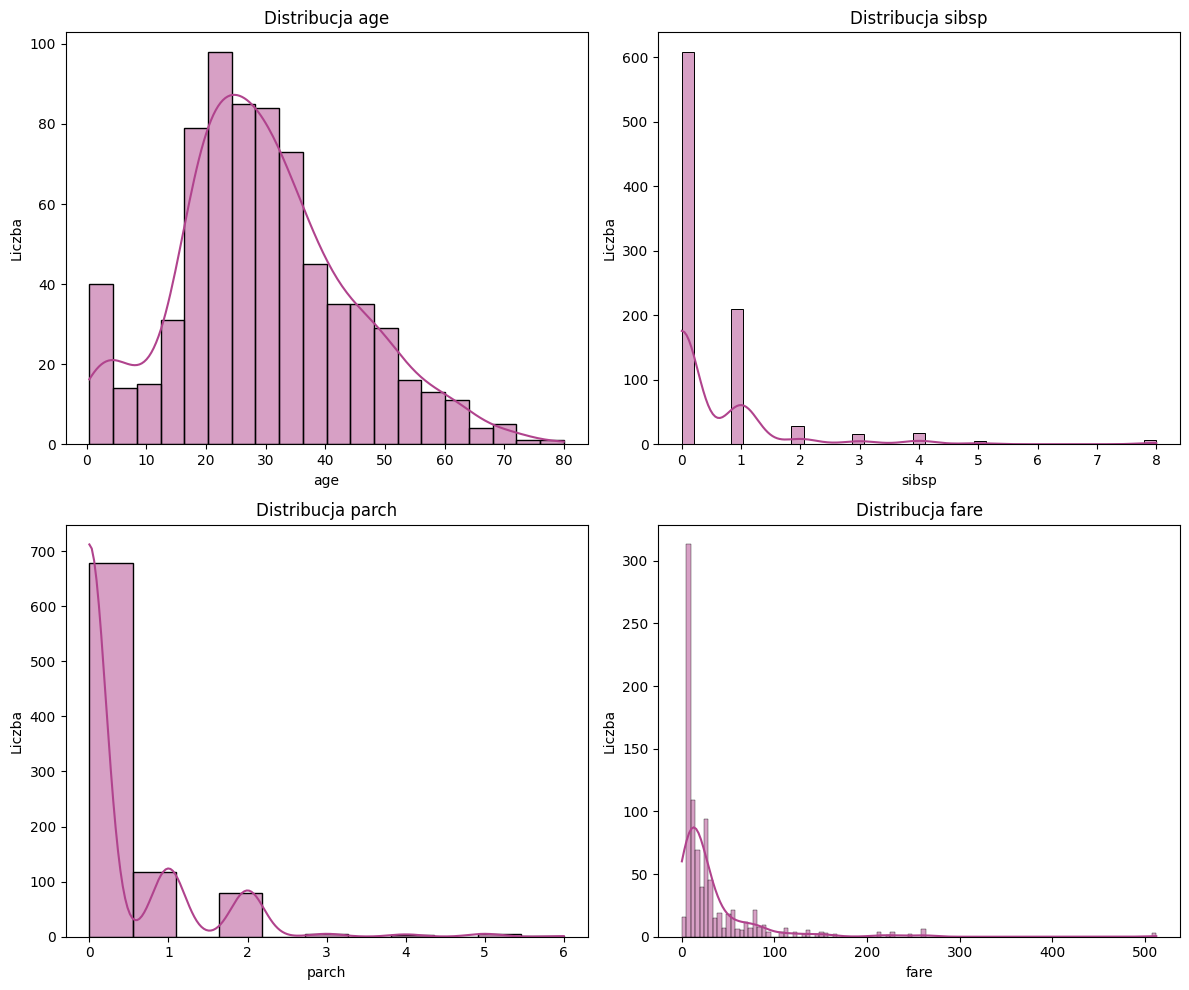

In [94]:
# Plot wartości numerycznych
plt.figure(figsize=(12, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, color="#b0438d")
    plt.title(f'Distribucja {feature}')
    plt.xlabel(feature)
    plt.ylabel('Liczba')

plt.tight_layout()
plt.show()

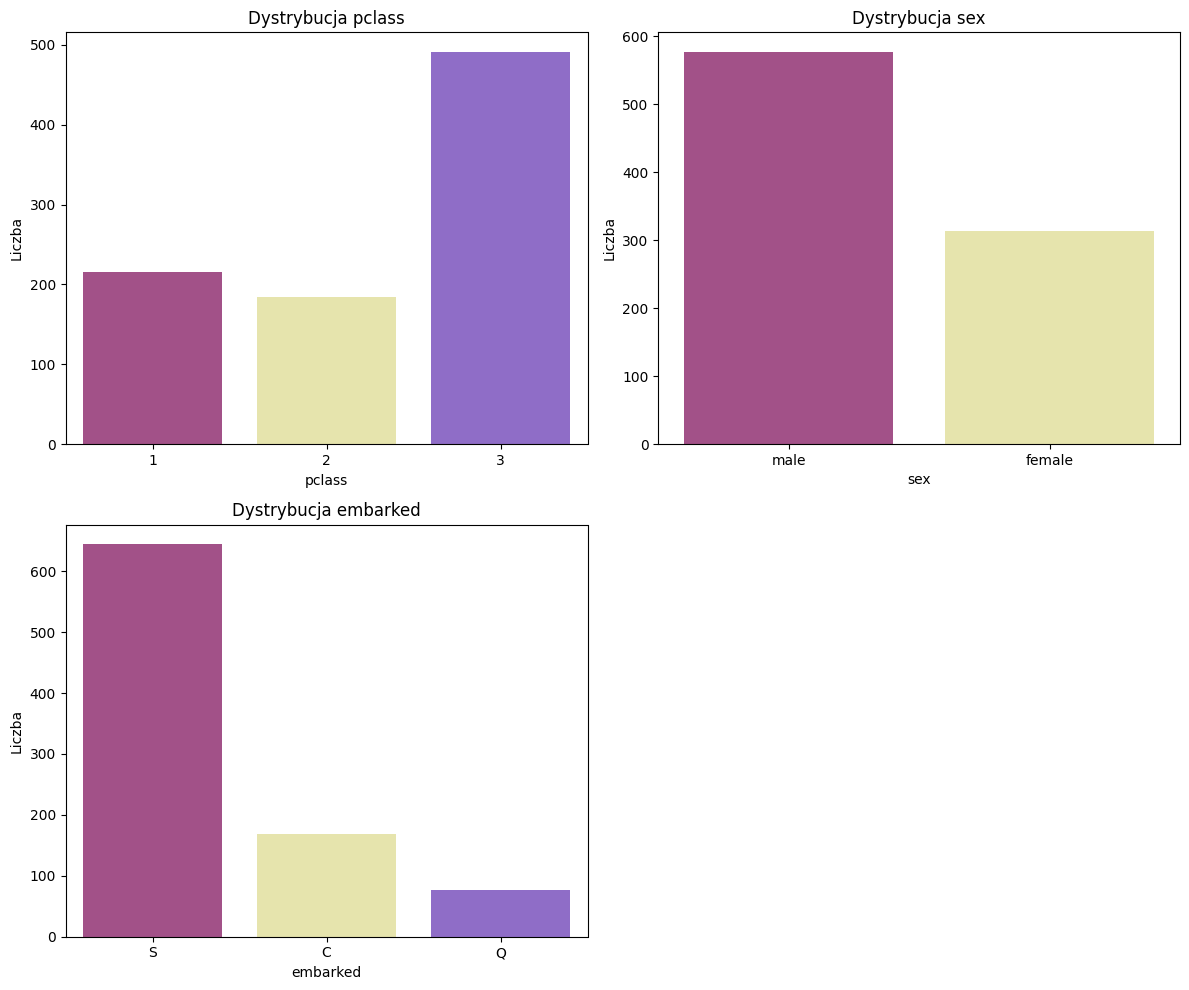

In [102]:
# Plot wartości kategorycznych
plt.figure(figsize=(12, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=data, palette=palet, hue=feature, legend=False)
    plt.title(f'Dystrybucja {feature}')
    plt.xlabel(feature)
    plt.ylabel('Liczba')

plt.tight_layout()
plt.show()

In [97]:
fig = px.scatter(
    data,
    x="age",
    y="fare",
    color="survived",
    hover_data=["sex", "pclass"],
    title="Interaktywny wykres: Wiek vs Cena biletu (kolor: przeżycie)"
)
fig.show()

In [98]:
fig = px.bar(
    data.groupby("pclass")["survived"].mean().reset_index(),
    x="pclass",
    y="survived",
    title="Średni wskaźnik przeżycia według klasy",
    labels={"Survived": "Prawdopodobieństwo przeżycia"}
)
fig.show()

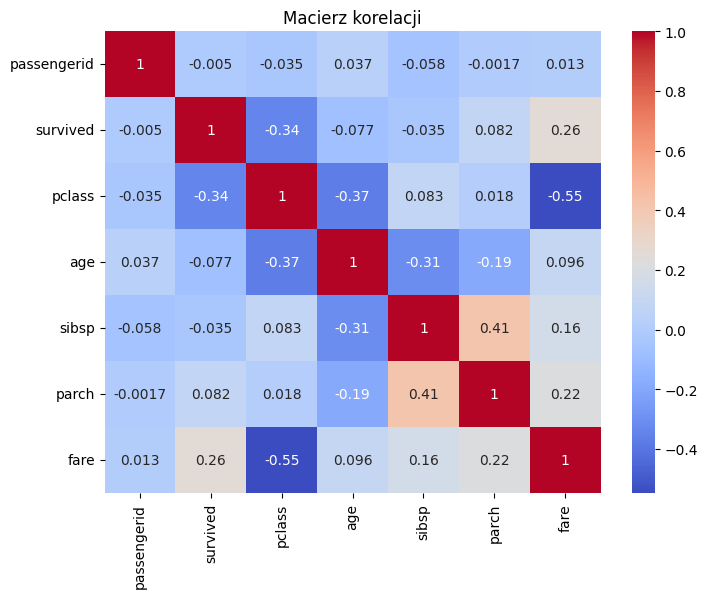

In [99]:
# Korelacja między cechami
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.title("Macierz korelacji")
plt.show()

## 5. Przygotowanie danych do modelu
Etapy przygotowania danych:
- Wybór odpowiednich kolumn
- Zamiana wartości kategorycznych na liczbowe
- Obsługa brakujących danych
- Podział na zbiór treningowy, walidacyjny i testowy

In [103]:
# Wybieramy kolumny
data_simple = data[["pclass", "sex", "age", "fare", "survived"]]

In [105]:
# Usuwamy wiersze z brakującymi wartościami
data_simple = data_simple.dropna()

In [106]:
# Zamieniamy płeć na liczby
X = data_simple.drop("survived", axis=1)
X["sex"] = X["sex"].map({"female": 0, "male": 1})
y = data_simple["survived"]

In [107]:
# Podział danych
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Rozmiary zbiorów:")
print("Treningowy:", X_train.shape)
print("Walidacyjny:", X_val.shape)
print("Testowy:", X_test.shape)

Rozmiary zbiorów:
Treningowy: (499, 4)
Walidacyjny: (107, 4)
Testowy: (108, 4)


In [108]:
X.head()

,pclass,sex,age,fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [109]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

## 6. Wartości odstające
Wartości odstające to dane znacznie odbiegające od reszty.

In [110]:
# Prosty sposób: uznajmy wartości powyżej 2 odchyleń standardowych za odstające
import numpy as np

mean_age = X_train["age"].mean()
std_age = X_train["age"].std()

outliers = X_train[(X_train["age"] > mean_age + 2*std_age) | (X_train["age"] < mean_age - 2*std_age)]
print("Liczba wykrytych wartości odstających:", len(outliers))

Liczba wykrytych wartości odstających: 18


## 7. Feature Engineering
Tworzenie nowych cech może pomóc modelowi lepiej rozumieć dane.
Pandas pozwala łatwo dodawać nowe kolumny.

In [111]:
# Dodajmy nową kolumnę: czy pasażer był dzieckiem (wiek < 12)
X_train["is_child"] = (X_train["age"] < 12).astype(int)
X_val["is_child"] = (X_val["age"] < 12).astype(int)
X_test["is_child"] = (X_test["age"] < 12).astype(int)

X_train.head()

,pclass,sex,age,fare,is_child
37,3,1,21.0,8.0500,0
58,2,0,5.0,27.7500,1
57,3,1,28.5,7.2292,0
94,3,1,59.0,7.2500,0
209,1,1,40.0,31.0000,0


---

# Zadanie
Twoje zadanie to przeprowadzenie wstępnej analizy i przygotowania nowego zbioru danych.

Wykonaj następujące kroki:
1. Załaduj dowolny mały zbiór danych
2. Wykonaj wstępną eksplorację danych (EDA) - sprawdź jakimi danymi się zajmujesz, sprawdź wartości brakujące, zwizualizuj dane (wykresy)
3. Zajmij się brakującymi danymi (strategia:średnia (mean()), mediana (median()), lub usunięcie wierszy (dropna()).)
4. Podziel dane
5. (Opcjonalnie) Wykonaj skalowanie zmiennych numerycznych (StandardScaler)
6. (Opcjonalne) Napisz co zrobiłeś/łaś w kilku zdaniach + załącz wykresy i podeślij na discordzie